In [1]:
import numpy as np

class ProjectedGradientDescent_logistic:
    def __init__(self, D_init, theta_init, b, x, y, alphas, lambda_0, lambda_1, lambda_2, lr=0.01, max_iter=1000, tol=1e-6):
        self.D = D_init.copy()
        self.theta = theta_init.copy()
        self.b = b
        self.x = x
        self.y = y
        self.alphas = alphas
        self.lambda_0 = lambda_0
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.history = []

    @staticmethod
    def logistic_loss(x):
        return np.log(1 + np.exp(-x))

    @staticmethod
    def grad_logistic_loss(x):
        return - 1 / (1 + np.exp(x))

    def compute_gradient_theta(self, theta, b, y, alphas, lambda_2):
        grad_theta = np.zeros_like(theta)
        for i in range(len(y)):
            x = y[i] * (np.dot(theta, alphas[i]) + b)
            grad_theta += self.grad_logistic_loss(x) * y[i] * alphas[i]
        return grad_theta + 2 * lambda_2 * theta

    def compute_gradient_b(self, theta, b, y, alphas):
        grad_b = 0
        for i in range(len(y)):
            x = y[i] * (np.dot(theta, alphas[i]) + b)
            grad_b += self.grad_logistic_loss(x) * y[i]
        return grad_b

    @staticmethod
    def compute_gradient_D(D, x, alphas, lambda_0):
        grad_D = np.zeros_like(D)
        for i in range(len(x)):
            grad_D +=  (x[i] - np.dot(D, alphas[i])) @ alphas[i].T
        return - 2 * lambda_0 * grad_D

    @staticmethod
    def project_D(D):
        norm_D = np.linalg.norm(D)
        if norm_D > 1:
            D /= norm_D
        return D

    def objective(self):
        S = 0
        for i in range(len(self.y)):
            reconstruction_error = self.lambda_0 * np.linalg.norm(self.x[i] - np.dot(self.D, self.alphas[i])) ** 2
            prediction_error = self.logistic_loss(self.y[i]*(np.dot(self.theta, self.alphas[i]) + self.b))
            sparsity_penalty = self.lambda_1 * np.linalg.norm(self.alphas[i], 1)
            S += prediction_error + reconstruction_error + sparsity_penalty
        regularization = self.lambda_2 * np.linalg.norm(self.theta) ** 2
        return S + regularization

    def optimize(self):
        for iter in range(self.max_iter):
            grad_theta = self.compute_gradient_theta(self.theta, self.b, self.y, self.alphas, self.lambda_2)
            grad_D = self.compute_gradient_D(self.D, self.x, self.alphas, self.lambda_0)
            grad_b = self.compute_gradient_b(self.theta, self.b, self.y, self.alphas)

            # Gradient updates
            self.theta -= self.lr * grad_theta
            self.b -= self.lr * grad_b
            self.D -= self.lr * grad_D

            # Project D onto the feasible set
            self.D = self.project_D(self.D)

            # Compute objective and check convergence
            obj_value = self.objective()
            self.history.append(obj_value)

            if iter > 0 and abs(self.history[-1] - self.history[-2]) < self.tol:
                break

        return self.D, self.theta, self.b, self.history

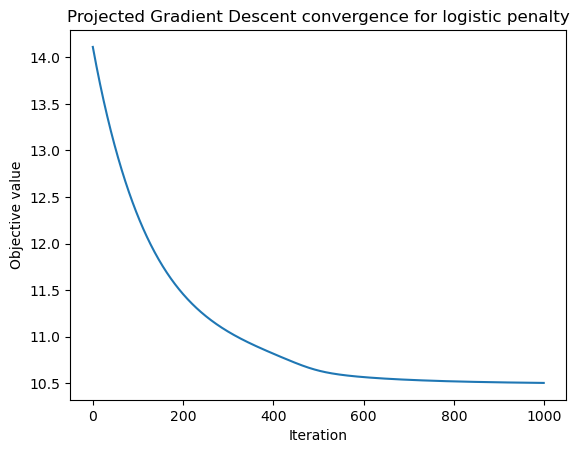

In [12]:
# Example usage
np.random.seed(32)
m, n_features = 5, 10
D_init = np.random.randn(n_features, n_features)
theta_init = np.random.randn(n_features)
b = 0
x = np.random.randn(m, n_features)
y = np.random.randn(m)
alphas = np.random.randn(m, n_features)  # Replace with precomputed alphas

lambda_0, lambda_1, lambda_2 = 0.1, 0.1, 0.1

pgd = ProjectedGradientDescent_logistic(D_init, theta_init, b, x, y, alphas, lambda_0, lambda_1, lambda_2)
D_opt, theta_opt, b_opt, history = pgd.optimize()

# Plot convergence
import matplotlib.pyplot as plt
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Objective value")
plt.title("Projected Gradient Descent convergence for logistic penalty")
plt.show()
